# Logistic-Regression Practice

    Jeremy Kawahigashi
    11/8/24
    Logistic Regression Homework
    ECEGR 4750
    

We will use a version of the famous Titanic data set that requires very little cleaning.

In [1]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

Read in the data set.

In [2]:
t_df = pd.read_csv('titanic_data.csv', index_col='PassengerId')
t_df = t_df.dropna()

Remove columns that don't make reasonable numeric predictors.

In [3]:
t_df.drop(columns=['Name', 'Cabin', 'Ticket'], inplace=True)

Convert the remaining columns to use numeric labels.

In [4]:
t_df['Sex'].replace(['male', 'female'], [1, 0], inplace=True)
t_df['Embarked'].replace(['S', 'C', 'Q'], [0, 1, 2], inplace=True)

/var/folders/3b/s6fvjch545vdgjngslp7sv1m0000gn/T/ipykernel_43660/3375600970.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  t_df['Sex'].replace(['male', 'female'], [1, 0], inplace=True)
/var/folders/3b/s6fvjch545vdgjngslp7sv1m0000gn/T/ipykernel_43660/3375600970.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downc

Extract the dependent and independent variables.

In [5]:
X = t_df.drop(columns=['Survived'])
y = t_df['Survived']

Split training and test sets.

Notice that we are  _practicing to learn_, not creating a product, so we have not paid attention to validation vs. test.

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

print(X_train)

print(f"X_train: {X_train.shape[0]}")
print(f"X_test: {X_test.shape[0]}")
print(f"y_train: {y_train.shape[0]}")
print(f"y_test: {y_test.shape[0]}")


total_samples = X.shape[0]
print(f"Training set percentage: {X_train.shape[0] / total_samples * 100:.2f}%")
print(f"Test set percentage: {X_test.shape[0] / total_samples * 100:.2f}%")


cardinalityP = t_df['Pclass'].nunique()
print(f"Cardinality of 'Pclass': {cardinalityP}")



             Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
PassengerId                                                    
171               1    1  61.0      0      0  33.5000         0
450               1    1  52.0      0      0  30.5000         0
702               1    1  35.0      0      0  26.2875         0
149               2    1  36.5      0      2  26.0000         0
274               1    1  37.0      0      1  29.7000         1
...             ...  ...   ...    ...    ...      ...       ...
836               1    0  39.0      1      1  83.1583         1
648               1    1  56.0      0      0  35.5000         1
711               1    0  24.0      0      0  49.5042         1
453               1    1  30.0      0      0  27.7500         1
4                 1    0  35.0      1      0  53.1000         0

[128 rows x 7 columns]
X_train: 128
X_test: 55
y_train: 128
y_test: 55
Training set percentage: 69.95%
Test set percentage: 30.05%
Cardinality of 'Pclass': 3


### Run everything up to this point and check the variable explorer for the following.
#### Do you have distinct training and test sets for the independent and dependent variables? Put the answer in your Jupyter notebook. Include the sizes of the sets in cardinality and percentage.



    X_train: 128
    X_test: 55
    y_train: 128
    y_test: 55
    Training set percentage: 69.95%
    Test set percentage: 30.05%
    Cardinality of 'Pclass': 3
        

#### Look at the two training sets and at least one test set to verify they contain what you expect.
Are there any issues? Put the answer in your Jupyter notebook. Include an explanation or discussion if necessary.

In [7]:
logmodel = sm.Logit(y_train, sm.add_constant(X_train)).fit(disp=False)
print(logmodel.summary())

                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  128
Model:                          Logit   Df Residuals:                      120
Method:                           MLE   Df Model:                            7
Date:                Thu, 07 Nov 2024   Pseudo R-squ.:                  0.2985
Time:                        20:52:32   Log-Likelihood:                -57.313
converged:                       True   LL-Null:                       -81.703
Covariance Type:            nonrobust   LLR p-value:                 2.506e-08
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9831      1.405      3.547      0.000       2.230       7.736
Pclass        -0.9902      0.597     -1.660      0.097      -2.159       0.179
Sex           -2.9254      0.613     -4.775      0.0

### Are there any predictors that are not statistically significant in the conventional sense?
A variable is conventionally statistically significant if its _p_ value is less than 0.05. (Do you know why?)



    Pclass (p = 0.197)
    SibSp (p = 0.556)
    Parch (p = 0.168)
    Fare (p = 0.316)
    Embarked (p = 0.340)

    A statistically significant variable means theres stong evidence the predictor is assoiated with the outcome 

    

### What variable is particularly strong in predicting survival?



    The sex variable is 0 which means it is a high impact on the liklyhood of survival 

### What does a negative coefficient imply and why?



    The coefficient is a relationship with the predictor and the odds. Thus in our case as the negative value for sex -2.56, means that sex = 0 is more likly to survive than if your sex = 1. 


### Based on your discussion, first think about what other variable ought to be a decent predictor?


    Age would also be a good predictor for this because of it's low p-value. In addition, the younger that you are the higher chance of survival you had

### Next, check the report output to see if that was the case.
Enter what variable you thought might be a good predictor and whether that turned out to be the case.

## Next, we wil learn about the quality of our predictions on the test set.

In [8]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Form our predictions, convert continuous [0, 1] predictions to binary
predictions = logmodel.predict(sm.add_constant(X_test))
bin_predictions = [1 if x >= 0.5 else 0 for x in predictions]

# We can now assess the accuracy and print out the confusion matrix
print(accuracy_score(y_test, bin_predictions))
print(confusion_matrix(y_test, bin_predictions))

0.7636363636363637
[[13  4]
 [ 9 29]]


    This means an accuracy of 74.5%
    True Negatives: 9
    False Positives: 10
    False Negatives: 4
    True Positives: 32

    Although it does change everytime the model is ran

## Discussion

### There is another way to evaluate our model... for a variety of thresholds.

Text(0, 0.5, 'True Positive Rate')

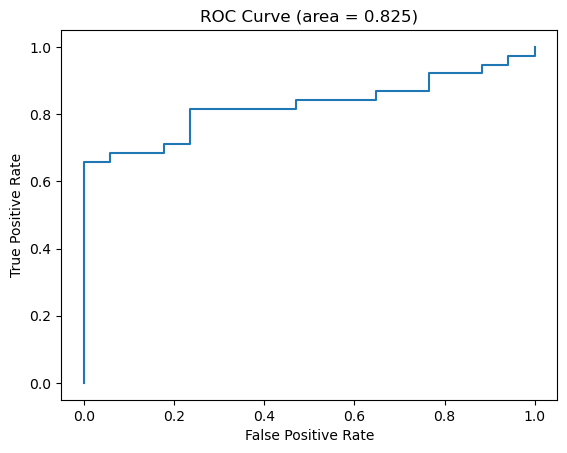

In [9]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, predictions)
roc_auc = roc_auc_score(y_test, predictions)

plt.plot(fpr, tpr, label='ROC Curve (area = %0.3f)' % roc_auc)
plt.title('ROC Curve (area = %0.3f)' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')